# 1. Setup

### 1.1 Install Dependencies and Setup

In [2]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
len(gpus)

1

### 1.2 Load Data

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# Build data pipeline
batch_size=32
image_size=(100,100)

train_data = tf.keras.utils.image_dataset_from_directory('data/Master Folder/train', batch_size=batch_size, image_size=image_size)
test_data = tf.keras.utils.image_dataset_from_directory('data/Master Folder/test', batch_size=batch_size, image_size=image_size)
valid_data = tf.keras.utils.image_dataset_from_directory('data/Master Folder/valid', batch_size=batch_size, image_size=image_size)

Found 750 files belonging to 3 classes.
Found 32 files belonging to 3 classes.
Found 30 files belonging to 3 classes.


In [7]:
train_data_iterator = train_data.as_numpy_iterator()

In [8]:
# batch: Tuple[input, target]
batch = train_data_iterator.next()

In [9]:
# 32 inputs with img 100x100, 3 channels
batch[0].shape

(32, 100, 100, 3)

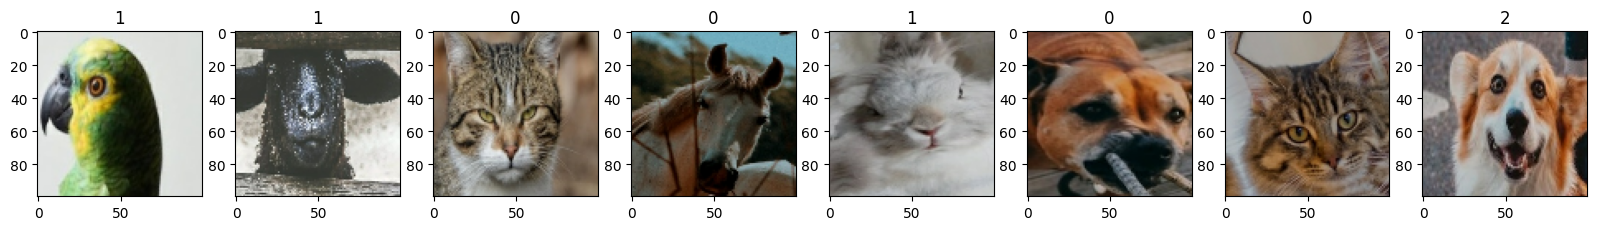

In [10]:
# Class 0 = ANGRY
# Class 1 = SAD
# Class 2 = HAPPY
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for index, img in enumerate(batch[0][:8]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

# 2. Preprocess Data

### 2.1 Scale Data

In [11]:
# Scale the values from 0-255 to 0-1
train_data = train_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255, y))
valid_data = valid_data.map(lambda x, y: (x/255, y))

In [12]:
scaled_it = train_data.as_numpy_iterator()

In [13]:
batch = scaled_it.next()

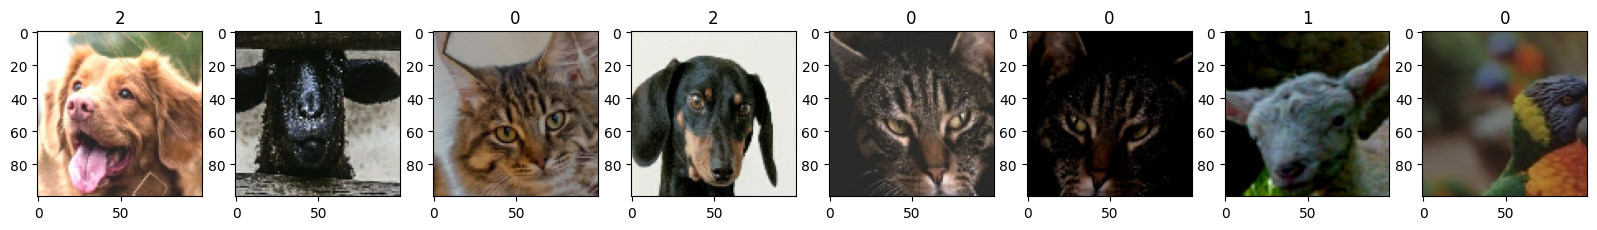

In [14]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data

In [15]:
train = train_data
val = valid_data
test = test_data

# 3. Model

### 3.1 Build Learning Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, RandomRotation, RandomZoom, RandomFlip
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam

In [67]:
# Surpress warning
tf.get_logger().setLevel('ERROR')

# Conv2d - 16 filters, 3x3 pixels, stride 1
# relu - convert negative values to 0
# Input - 256x256, 3 channels

# ===========================================================================
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dense(4, activation='softmax'))

# ===========================================================================

# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))

# ===========================================================================
# model = Sequential()

# model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
# model.add(RandomZoom((0.1,0.3)))
# model.add(RandomRotation((0.1,0.3)))
# model.add(RandomFlip('horizontal'))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D())

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dense(4, activation='softmax'))

# ===========================================================================
model = Sequential()

model.add(RandomZoom((0.1,0.2), input_shape=(100,100,3)))
model.add(RandomRotation(0.2))
model.add(RandomFlip('horizontal'))

# model.add(Conv2D(16, (3,3)))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# ===========================================================================
# model = Sequential()

# # Convolutional layers
# model.add(RandomZoom((0.1,0.2), input_shape=(100,100,3)))
# model.add(RandomRotation(20))
# model.add(RandomFlip('horizontal'))

# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.25))

# # Flatten layer
# model.add(Flatten())

# # Dense layers with Batch Normalization and Dropout
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(3, activation='softmax'))


In [68]:
# model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=[SparseCategoricalAccuracy()])
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_zoom_4 (RandomZoom)  (None, 100, 100, 3)       0         
                                                                 
 random_rotation_4 (RandomRo  (None, 100, 100, 3)      0         
 tation)                                                         
                                                                 
 random_flip_4 (RandomFlip)  (None, 100, 100, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 49, 49, 32)       

### 3.2 Train

In [70]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [71]:
# hist = model.fit(train, epochs=50, validation_data=val, callbacks=[early_stopping])
hist = model.fit(train, epochs=50, validation_data=val)

Epoch 1/50
24/24 [==============================] - 7s 192ms/step - loss: 1.2370 - accuracy: 0.3200 - val_loss: 1.0962 - val_accuracy: 0.3667
Epoch 2/50
24/24 [==============================] - 4s 170ms/step - loss: 1.0993 - accuracy: 0.3547 - val_loss: 1.0957 - val_accuracy: 0.4000
Epoch 3/50
24/24 [==============================] - 4s 176ms/step - loss: 1.0914 - accuracy: 0.3947 - val_loss: 1.0958 - val_accuracy: 0.3333
Epoch 4/50
24/24 [==============================] - 5s 191ms/step - loss: 1.0845 - accuracy: 0.3800 - val_loss: 1.0889 - val_accuracy: 0.3667
Epoch 5/50
24/24 [==============================] - 4s 162ms/step - loss: 1.0618 - accuracy: 0.4373 - val_loss: 1.0882 - val_accuracy: 0.3333
Epoch 6/50
24/24 [==============================] - 4s 150ms/step - loss: 1.0468 - accuracy: 0.4587 - val_loss: 1.0634 - val_accuracy: 0.4667
Epoch 7/50
24/24 [==============================] - 4s 147ms/step - loss: 1.0206 - accuracy: 0.4840 - val_loss: 1.1283 - val_accuracy: 0.3333
Epoch 

### 3.3 Plot Performance

In [72]:
predicted = []
targets = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    for labels in yhat:
        predicted.append(np.argmax(labels))

    print('y', y)

    for a in y:
        targets.append(a)

correct=0
wrong=0
total=0
for i in range(len(targets)):
    if predicted[i] == targets[i]:
        correct += 1
    else:
        wrong += 1
    total += 1

print(predicted[5:])
print(targets[5:])
print(correct, wrong, total)

1/1 [==============================] - 0s 56ms/step
y [2 2 0 0 1 2 1 1 0 1 1 0 0 0 1 1 1 2 0 2 0 2 2 1 1 0 0 1 2 2 2 2]
[2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1]
[2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2]
16 16 32


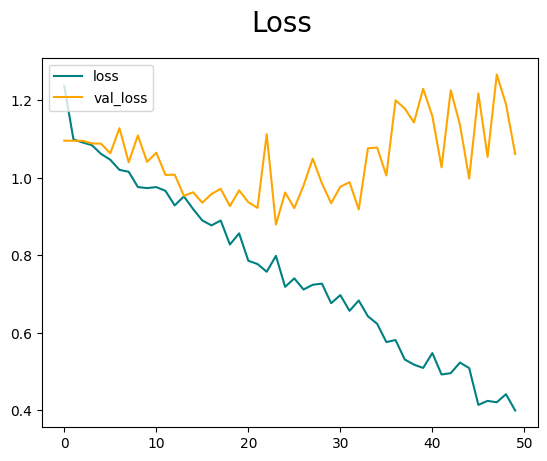

In [73]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

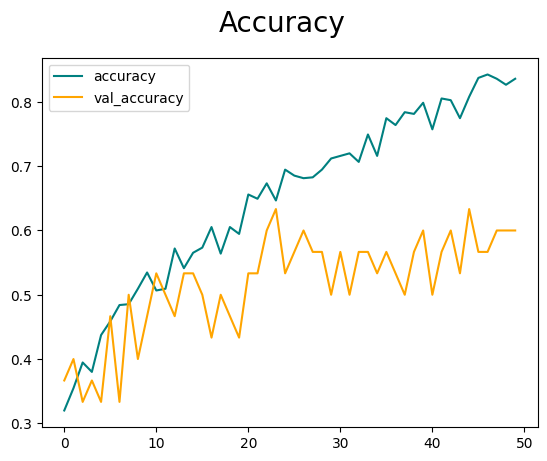

In [74]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

### 4.1 Evaluate

In [75]:
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [76]:
acc = SparseCategoricalAccuracy()

In [77]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    predicted = []

    for labels in yhat:
        predicted.append(np.argmax(labels))
    
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 15ms/step


In [78]:
print(f'Testing Accuracy:{acc.result().numpy()}')

Testing Accuracy:0.5


### 4.2 Test

In [79]:
import cv2

### Import test images

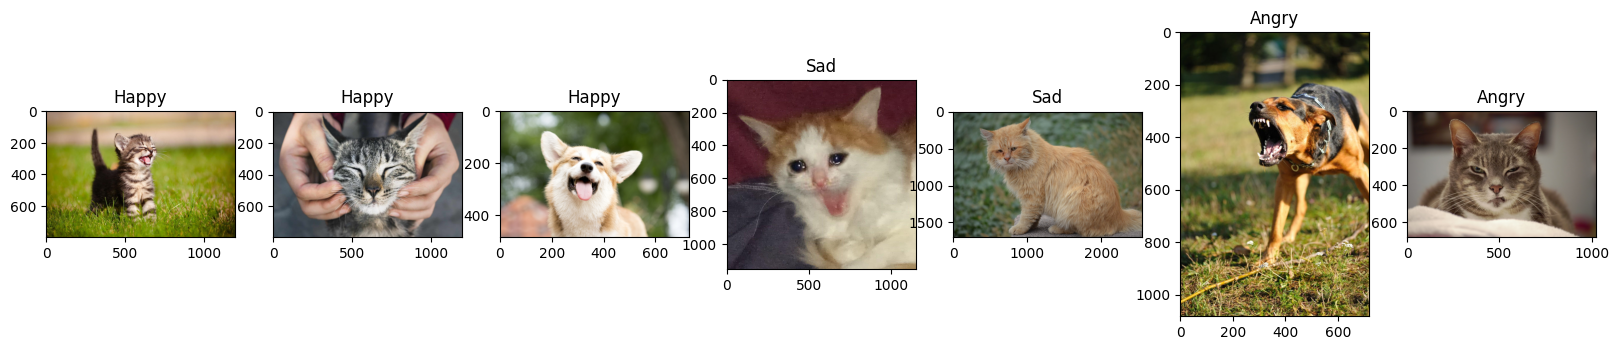

In [80]:
img1 = cv2.imread('test/happy_test1.jpg')
img2 = cv2.imread('test/happy_test2.jpg')
img3 = cv2.imread('test/happy_test3.jpeg')
img4 = cv2.imread('test/sad_test1.jpg')
img5 = cv2.imread('test/sad_test2.jpg')
img6 = cv2.imread('test/angry_test1.jpeg')
img7 = cv2.imread('test/angry_test2.jpg')

imgs = [img1, img2, img3, img4, img5, img6, img7]
targets = ['Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Angry', 'Angry']

fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for i in range(len(imgs)):
    ax[i].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
    ax[i].title.set_text(targets[i])

### Resize test images

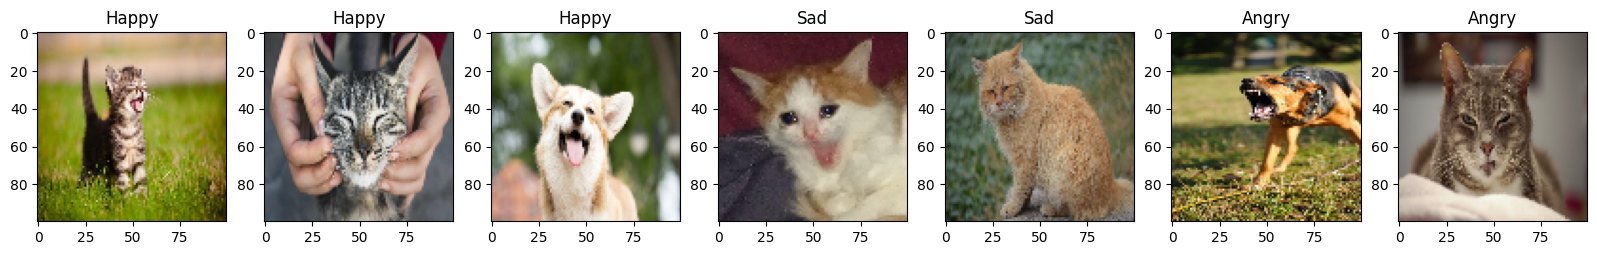

In [81]:
resized_imgs = []

for img in imgs:
    resized_imgs.append(tf.image.resize(img, (100,100)))

fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for i in range(len(imgs)):
    ax[i].imshow(cv2.cvtColor(resized_imgs[i].numpy().astype(np.uint8), cv2.COLOR_BGR2RGB))
    ax[i].title.set_text(targets[i])

### Predict test images

In [82]:
predictions = []

for img in resized_imgs:
    yhat = model.predict(np.expand_dims(img/255,0))
    label = np.argmax(yhat)
    predictions.append(label)

1/1 [==============================] - 0s 15ms/step


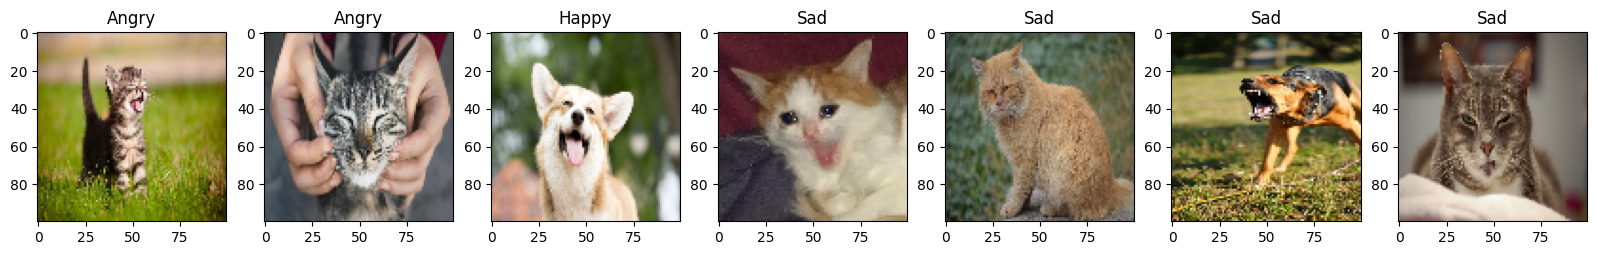

In [83]:
y_class = ['Angry', 'Sad', 'Happy']

fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for i in range(len(imgs)):
    ax[i].imshow(cv2.cvtColor(resized_imgs[i].numpy().astype(np.uint8), cv2.COLOR_BGR2RGB))
    ax[i].title.set_text(y_class[predictions[i]])

# 5. Save Model

In [84]:
from tensorflow.keras.models import load_model

In [85]:
model_path = os.path.join('models', 'model.h5')
model.save(model_path)

In [86]:
loaded_model = load_model(model_path)